In [13]:
#http://ai.baidu.com/docs#/NLP-API/top
#http://ai.baidu.com/docs#/NLP-Python-SDK/top

#https://console.bce.baidu.com/ai/?_=1533799084305&fromai=1#/ai/nlp/app/detail~appId=475593
from aip import AipNlp


from sklearn.metrics.pairwise import euclidean_distances
import jieba
import numpy as np

""" 你的 APPID AK SK """
APP_ID = '11653901'
API_KEY = '0ZNowBfd1P17tkxid4GUsPar'
SECRET_KEY = 'FV1ZKqlxRGTLkNMTlI9sjn9w4wSbsAnn'

client = AipNlp(APP_ID, API_KEY, SECRET_KEY)

In [16]:
def calEuclideanDistance(vec1,vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    dist = np.sqrt(np.sum(np.square(vec1 - vec2)))
    return dist

In [21]:
word = "张飞"
""" 调用词向量表示 """
vec1 = client.wordEmbedding(word);
vec1['vec']



word = "刘备"
""" 调用词向量表示 """
vec2 = client.wordEmbedding(word);
vec2['vec']



word = "吕布"
""" 调用词向量表示 """
vec3 = client.wordEmbedding(word);
vec3['vec']



word = "嫦娥"
""" 调用词向量表示 """
vec4 = client.wordEmbedding(word);
vec4['vec']




word = "唐僧"
""" 调用词向量表示 """
vec5 = client.wordEmbedding(word);
vec5

{'log_id': 7959207450239145084,
 'vec': [-0.496797,
  -0.215675,
  -0.180166,
  0.367591,
  0.589088,
  0.401298,
  0.445088,
  0.772308,
  -0.511662,
  -0.389466,
  0.80925,
  1.19582,
  0.551202,
  0.469768,
  0.502887,
  -0.869634,
  0.266394,
  0.262435,
  0.887966,
  0.538467,
  0.104384,
  -0.0810972,
  0.64785,
  -0.576149,
  0.162704,
  0.188425,
  -0.0167035,
  0.263415,
  -0.616897,
  0.206128,
  -0.134788,
  0.521797,
  0.291169,
  0.121013,
  -1.05254,
  0.204665,
  0.246615,
  -0.316784,
  -0.71004,
  -0.485514,
  0.423172,
  -0.359499,
  0.0325945,
  -0.680289,
  1.08517,
  0.472621,
  -0.412215,
  0.310417,
  0.199404,
  -0.973963,
  0.0747003,
  0.652828,
  -0.394634,
  -0.466805,
  0.695522,
  0.471395,
  -0.483428,
  0.212539,
  1.05859,
  -0.902028,
  -0.582087,
  -0.654086,
  0.381806,
  -0.314904,
  -1.01204,
  0.0917196,
  0.724945,
  -1.37274,
  0.490903,
  -0.211966,
  0.217238,
  -0.249422,
  0.213104,
  -0.107747,
  0.656458,
  -0.13149,
  -0.0718832,
  0.0820

In [22]:
dist2 = calEuclideanDistance(vec1['vec'], vec2['vec'])
dist3 = calEuclideanDistance(vec1['vec'], vec3['vec'])
dist4 = calEuclideanDistance(vec1['vec'], vec3['vec'])
dist5 = calEuclideanDistance(vec1['vec'], vec4['vec'])

print(dist2,dist3,dist4,dist5)

12.000370855535673 12.662551404785935 12.662551404785935 22.233583243013523


In [33]:
word = "json"
""" 调用词向量表示 """
vec6 = client.wordEmbedding(word);
vec6

word = "jsonp"
""" 调用词向量表示 """
vec7 = client.wordEmbedding(word);
vec7
dist7 = calEuclideanDistance(vec6['vec'], vec7['vec'])
dist7

14.81847586232387

In [24]:
dist7

23.01001254869192

In [9]:
APP_ID = '11169082'
API_KEY = 'xUzn3kBiiAEyMzBPscDoSF08'
SECRET_KEY = 'heSAxjrFo1TEGpQcNHGi3kO5zWfOhg4O'

client = AipImageClassify(APP_ID, API_KEY, SECRET_KEY)

In [10]:
PATH = './FasterRCNN_CNTK/MyTest/Output/Car/*'

In [11]:
def get_file(path):
    with open(path, 'rb') as fp:
        return fp.read()

In [15]:
len(glob(PATH))

9997

In [16]:
for i, pth in enumerate(glob(PATH)):
    try:
        directory = pth.split('/')[0] + '/' +pth.split('/')[1]+'/' +pth.split('/')[2]+'/' +pth.split('/')[3]+'/' +'CarLabels2'+'/'
        #print(directory)

        fileext = pth.split('/')[-1].split('.')[-1]
        showimage = cv2.imread(pth)
        show = cv2.cvtColor(showimage, cv2.COLOR_BGR2RGB)
    #     plt.imshow(show)
    #     plt.show()
        options = {}
        options['top_num'] = 1
        image = get_file(pth)
        result = client.carDetect(image, options)
        finalfile = directory + result['result'][0]['name'] + '_'+ str(i) + '.' + fileext
        cv2.imwrite(finalfile,showimage)
        #print(result.name + str(i))
        os.remove(pth)
        time.sleep(0.1)
        
        if(i%50 ==0 ):
            print(str(i), 'Done...')
    except Exception as e:
        print('Error------>' , str(i),'------>', str(pth),'------>', str(e))
        continue
print('All Done...................')

0 Done...
Error------> 41 ------> ./FasterRCNN_CNTK/MyTest/Output/Car/8718_regr_20180401133738563_172.20.2.10_041248.jpg ------> 'result'
50 Done...
100 Done...
150 Done...
200 Done...
250 Done...
300 Done...
350 Done...
400 Done...
450 Done...
500 Done...
550 Done...
600 Done...
650 Done...
700 Done...
750 Done...
800 Done...
850 Done...
900 Done...
Error------> 925 ------> ./FasterRCNN_CNTK/MyTest/Output/Car/3409_regr_20180418175208954_172.20.2.10_050159.jpg ------> 'result'
950 Done...
Error------> 961 ------> ./FasterRCNN_CNTK/MyTest/Output/Car/4707_regr_20180405103007580_172.20.2.10_042774.jpg ------> 'result'
1000 Done...
1050 Done...
1100 Done...
1150 Done...
1200 Done...
1250 Done...
1300 Done...
1350 Done...
Error------> 1382 ------> ./FasterRCNN_CNTK/MyTest/Output/Car/5818_regr_20180413113614533_172.20.2.10_047074.jpg ------> 'result'
1400 Done...
1450 Done...
1500 Done...
1550 Done...
1600 Done...
1650 Done...
1700 Done...
1750 Done...
1800 Done...
1850 Done...
1900 Done...


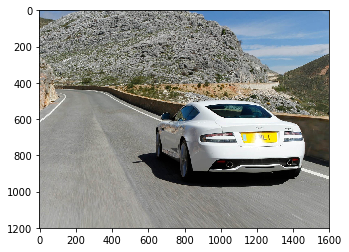

{'color_result': '白色',
 'location_result': {'height': 444, 'left': 578, 'top': 500, 'width': 885},
 'log_id': 6276752871705882668,
 'result': [{'name': '阿斯顿马丁DB9',
   'score': 0.53160929679871,
   'year': '2013-2016'}]}

In [14]:
showimage = cv2.imread(PATH)
show = cv2.cvtColor(showimage, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()

options = {}
options['top_num'] = 1
image = get_file(PATH)
client.carDetect(image, options)


In [19]:
r = {'log_id': 5568929693257822564, 'location_result': {'width': 630, 'top': 151, 'height': 380, 'left': 168}, 'result': [{'score': 0.99917483329773, 'name': '标致307', 'year': '2008-2013'}], 'color_result': '颜色无法识别'}

'标致307'